In [ ]:
# This reads in FITS files from a directory and saves the parallactic angles in
# the headers to a header key PynPoint will recognize, i.e., 'PARANG'

# Created 2018 Sept. 23 by E.S.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from astropy.io import fits
from astropy.convolution import convolve, Gaussian1DKernel
import multiprocessing as mp
from multiprocessing import Process, Queue, Pool
#%matplotlib inline
#%matplotlib qt

In [2]:
# stem 

stem_retrieve = ('/home/../../media/unasemaje/Elements/lbti_data_reduction/180507_fizeau_altair/03_ramp_removed_pca_background_subted/')
stem = ('/home/unasemaje/Documents/git.repos/lbti_altair_fizeau/pynpoint_experimentation_altair/input_place/')

In [5]:
# read in dark-subtracted and bad-pixel-corrected frames

psfLocUp = [310,850] # (y,x) convention; for frames <7735
goodFrameArrayUpNod = np.concatenate((np.arange(5910,6005),
                                     np.arange(6022,6029),
                                     np.arange(6119,6302)))

psfLocDown = [115,865] # (y,x) convention; for frames >7772
goodFrameArrayDownNod = np.concatenate((np.arange(7975,8239),
                                       np.arange(8327,8602),
                                       np.arange(8878,9176),
                                       np.arange(9771,9891),
                                       np.arange(9894,10125),
                                       np.arange(10263,10395),
                                       np.arange(10505,10677)))
                                       

def save_parang(framenum,psf_loc):
    
    img_string = 'lm_180507_'+str("{:0>6d}".format(framenum))+'_nPCA164.fits'
    
    # if file exists
    if os.path.isfile(stem_retrieve+img_string):
        
        # read in image
        sciImg, header = fits.getdata(stem_retrieve+img_string,0,header=True)

        print(header['LBT_PARA'])
        
        header['PARANG'] = np.float(header['LBT_PARA'])
        
        # write back out
        print(np.shape(sciImg[psf_loc[0]-50:psf_loc[0]+50,psf_loc[1]-50:psf_loc[1]+50]))
        hdu = fits.PrimaryHDU(sciImg[psf_loc[0]-50:psf_loc[0]+50,psf_loc[1]-50:psf_loc[1]+50].astype(np.float64), 
                              header=header)
        hdul = fits.HDUList([hdu])
    
        hdul.writeto(stem+img_string, overwrite=False)
        print('Saved '+str("{:0>6d}".format(framenum)))
        
    else:
        
        print('File '+img_string+' not found')

In [6]:
# up nod frames
for img in range(0,len(goodFrameArrayUpNod)):
    save_parang(goodFrameArrayUpNod[img],psfLocUp)
    
# down nod frames
for img in range(0,len(goodFrameArrayDownNod)):
    save_parang(goodFrameArrayDownNod[img],psfLocDown)

-37.722728
(100, 100)
Saved 005910
-37.716388
(100, 100)
Saved 005911
-37.710286
(100, 100)
Saved 005912
-37.704661
(100, 100)
Saved 005913
-37.704661
(100, 100)
Saved 005914
-37.698779
(100, 100)
Saved 005915
-37.692223
(100, 100)
Saved 005916
-37.692223
(100, 100)
Saved 005917
-37.686355
(100, 100)
Saved 005918
-37.680643
(100, 100)
Saved 005919
-37.674998
(100, 100)
Saved 005920
-37.674998
(100, 100)
Saved 005921
-37.669107
(100, 100)
Saved 005922
-37.663693
(100, 100)
Saved 005923
-37.663693
(100, 100)
Saved 005924
-37.657078
(100, 100)
Saved 005925
-37.651186
(100, 100)
Saved 005926
-37.645222
(100, 100)
Saved 005927
-37.645222
(100, 100)
Saved 005928
-37.639353
(100, 100)
Saved 005929
-37.633461
(100, 100)
Saved 005930
-37.627563
(100, 100)
Saved 005931
-37.627563
(100, 100)
Saved 005932
-37.622132
(100, 100)
Saved 005933
-37.616702
(100, 100)
Saved 005934
-37.616702
(100, 100)
Saved 005935
-37.611046
(100, 100)
Saved 005936
-37.604501
(100, 100)
Saved 005937
-37.604501
(100, 100

In [ ]:
# parallelize it

framenumArray = np.arange(4249,11336)

ncpu = mp.cpu_count()
pool = Pool(ncpu) # create pool object
mapping = pool.map(remove_ramp,framenumArray)

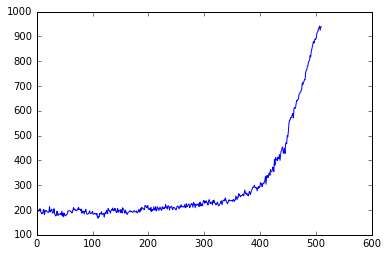

In [35]:
##################

# do it!
if __name__ == '__main__':
    main()

In [39]:
type(np.nanmedian(sciImg,axis=1)[0])

numpy.float64

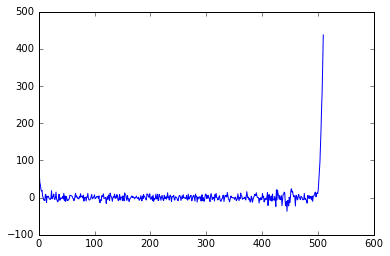

In [36]:
plt.plot(np.nanmedian(sciImg1,axis=1))
plt.show()

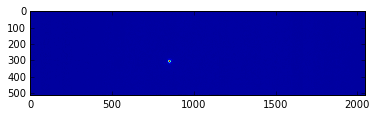

In [34]:
plt.imshow(sciImg1)
plt.show()

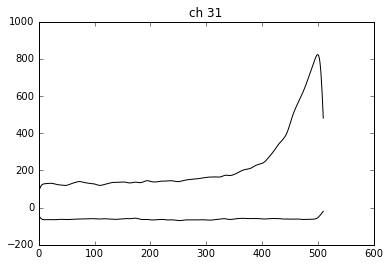

In [22]:
#plt.plot(xdata,ydata)
ydata1 = np.nanmedian(sciImg[:,:],axis=1)
gauss_kernel = Gaussian1DKernel(5)
smoothed_data_gauss1 = convolve(ydata1, gauss_kernel)
for chl in range(0,32):
    ydata = np.nanmedian(sciImg[:,64*chl:64*(chl+1)],axis=1)
    smoothed_data_gauss = convolve(ydata, gauss_kernel)
    plt.clf()
    plt.plot(xdata, smoothed_data_gauss, 'k')
    plt.plot(xdata, np.subtract(smoothed_data_gauss,smoothed_data_gauss1), 'k')
    plt.title('ch '+str(chl))
    plt.ylim([-200,1000])
    plt.savefig('test4_'+str("{:0>6d}".format(chl))+'.png', dpi=300)
    #plt.show()
#plt.axvline(x=123, linestyle = ':')
#plt.axvline(x=310, linestyle = ':')
#plt.ylim([-100,300])
#plt.savefig('test10.pdf', dpi=300)

In [4]:
def func(x, a, b, c, d):
    return a * np.exp(b * (x-d)) + c

In [9]:
xdata = np.arange(len(sciImg[:,0]))

In [5]:
gauss_kernel = Gaussian1DKernel(5)

In [26]:
ydata = np.nanmedian(sciImg[:,:],axis=1)
smoothed_data_gauss = convolve(ydata, gauss_kernel)

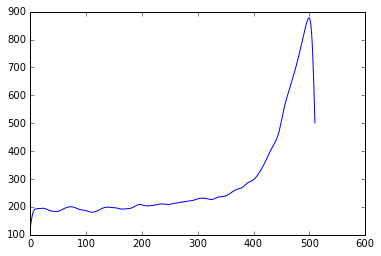

In [27]:
#plt.plot(ydata)
plt.plot(smoothed_data_gauss)
plt.show()

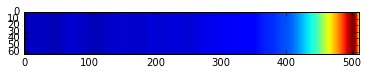

In [23]:
plt.imshow(np.tile(smoothed_data_gauss,(64,1)))
plt.show()

In [9]:
# subtract smoothing from each channel
for chl in range(0,32):
    #ydata = np.nanmedian(sciImg[:,64*chl:64*(chl+1)],axis=1)
    
    sciImg[:,64*chl:64*(chl+1)] -= np.tile(smoothed_data_gauss,(64,1)).T

/home/unasemaje/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Implicitly casting between incompatible kinds. In a future numpy release, this will raise an error. Use casting="unsafe" if this is intentional.
  """


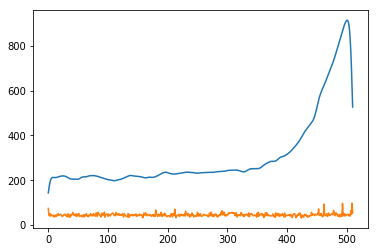

In [24]:
gauss_kernel = Gaussian1DKernel(10)
for chl in range(10,11):
    plt.plot(xdata, np.nanmedian(sciImg[:,64*chl:64*(chl+1)],axis=1))
    plt.plot(xdata, np.std(sciImg[:,64*chl:64*(chl+1)],axis=1))
#plt.plot(xdata, smoothed_data_gauss2+100, 'r--')
#plt.show()
plt.savefig('test7.pdf', dpi=300)

In [3]:
def fit_and_subtract_illumin_gradient(stem,startFrame,endFrame,quadChoice,indivChannel=False):
    '''
    INPUTS
    stem: filename stem for data
    startFrame: the first frame of the training set
    endFrame: the last frame of the training set
    quadchoice: the quadrant of the array we are interested in making a background for
    indivChannel: do you want to append PCA components that involve individual channel pedestals?
    
    OUTPUTS
    (none; FITS files are written out)
    '''

    # loop through each training set image and add it to a cube (endFrame is inclusive)
    print('Putting training frames into cube...')
    test_cube = np.nan*np.ones((endFrame-startFrame+1,511,2048), dtype = np.int64)
    
    mask_weird = make_first_pass_mask(quadChoice) # make the right mask
    
    for framenum in range(startFrame,endFrame+1): #endFrame+1): # 83, 67108
            
        # classically background-subtracted frames
        ##img_string = stem+'../02_background_subted/02a_subtraction_of_nod_off_median/'+'lm_180524_'+str("{:0>6d}".format(framenum))+'_02_02a.fits'

        # raw data (except that readout glitch correction has been done)
        img_string = stem+'lm_180507_'+str("{:0>6d}".format(framenum))+'.fits'
    
        # if FITS file exists in the first place
        if ((np.mod(framenum,1) == 0) & os.path.isfile(img_string)): 
            
            # read in image
            sciImg, header = fits.getdata(img_string,0,header=True)
        
            # mask weird parts of the readouts
            sciImg = np.multiply(sciImg,mask_weird)
        
            # add to cube
            test_cube[framenum-startFrame,:,:] = sciImg
            
        else:
            
            print('Hang on-- frame '+img_string+' not found!')
    
    # mask the raw training set
    test_cube = np.multiply(test_cube,mask_weird)
    
    # at this point, test_cube holds the (masked) background frames to be used as a training set
            
    # find the 2D median across all background arrays, and subtract it from each individual background array
    median_2d_bckgrd = np.nanmedian(test_cube, axis=0)    
    for t in range(0,endFrame-startFrame+1):
        test_cube[t,:,:] = np.subtract(test_cube[t,:,:],median_2d_bckgrd)         

    # at this point, test_cube holds the background frames which are dark- and 2D median-subtracted 

    # subtract the median from each individual background array (after it has been masked)
    for t in range(0,endFrame-startFrame+1):
        masked_slice = np.multiply(test_cube[t,:,:],mask_weird) # removes weird detector regions
        const_median = np.nanmedian(masked_slice)
        test_cube[t,:,:] = np.subtract(test_cube[t,:,:],const_median)   
        
    # at this point, test_cube holds the background frames which have had each frame's median value subtracted
        
    # remove a channel median from each channel in the science frame, since the  
    # channel pedestals will get taken out by the PCA components which are appended to the PCA
    # cube further below
    if indivChannel:
        print('Removing channel pedestals...')
        for slicenum in range(0,endFrame-startFrame+1): # loop over each slice
            for chNum in range(0,64): # loop over each channel in that slice
                test_cube[slicenum,:,chNum*64:(chNum+1)*64] = np.subtract(test_cube[slicenum,:,chNum*64:(chNum+1)*64],np.nanmedian(test_cube[slicenum,:,chNum*64:(chNum+1)*64]))
    
    # flatten each individual frame into a 1D array
    print('Flattening the training cube...')
    test_cube_1_1ds = np.reshape(test_cube,(np.shape(test_cube)[0],np.shape(test_cube)[1]*np.shape(test_cube)[2])) 
        
    ## carefully remove nans before doing PCA
    
    # indices of finite elements over a single flattened frame
    idx = np.isfinite(test_cube_1_1ds[0,:])
        
    # reconstitute only the finite elements together in another PCA cube of 1D slices
    training_set_1ds_noNaN = np.nan*np.ones((len(test_cube_1_1ds[:,0]),np.sum(idx))) # initialize array with slices the length of number of finite elements
    for t in range(0,len(test_cube_1_1ds[:,0])): # for each PCA component, populate the arrays without nans with the finite elements
        training_set_1ds_noNaN[t,:] = test_cube_1_1ds[t,idx]
    
    # do PCA on the flattened `cube' with no NaNs
    print('Doing PCA...')
    n_PCA = 12 # basis components
    #pca = PCA(n_components=n_PCA, svd_solver='randomized') # initialize object
    pca = RandomizedPCA(n_PCA) # for Python 2.7 
    test_pca = pca.fit(training_set_1ds_noNaN) # calculate PCA basis set
    del training_set_1ds_noNaN # clear memory
    
    # reinsert the NaN values into each 1D slice of the PCA basis set
    print('Putting PCA components into cube...')
    pca_comp_cube = np.nan*np.ones((n_PCA,511,2048), dtype = np.float32) # initialize a cube of 2D slices
    for slicenum in range(0,n_PCA): # for each PCA component, populate the arrays without nans with the finite elements
        pca_masked_1dslice_noNaN = np.nan*np.ones((len(test_cube_1_1ds[0,:]))) # initialize a new 1d frame long enough to contain all pixels
        pca_masked_1dslice_noNaN[idx] = pca.components_[slicenum] # put the finite elements into the right positions
        pca_comp_cube[slicenum,:,:] = pca_masked_1dslice_noNaN.reshape(511,2048).astype(np.float32) # put into the 2D cube

    # if I also want PCA slices for representing individual channel pedestal variations,
    # append slices representing each channel with ones
    extra_file_string = ''
    if indivChannel:
        
        # ... these slices that encode individual channel variations
        channels_alone = channels_PCA_cube()
        pca_comp_cube = np.concatenate((channels_alone,pca_comp_cube), axis=0)
        extra_file_string = '_w_channel_comps' # to add to filenames
    
    # save cube
    print('Saving PCA cube...')
    t = time.time()
    hdu = fits.PrimaryHDU(pca_comp_cube.astype(np.float32))
    del pca_comp_cube # clear memory
    hdul = fits.HDUList([hdu])
    
    
    hdul.writeto(stem+'/pca_cubes/background_PCA_hunzikerStyle_seqStart_'
                 +str("{:0>6d}".format(startFrame))+'_seqStop_'+str("{:0>6d}".format(endFrame))+extra_file_string+'.fits', 
                    overwrite=True)
    
    elapsed = time.time() - t
    print(elapsed)
    print('PCA cube saved as '+str("{:0>6d}".format(startFrame))+'_seqStop_'+str("{:0>6d}".format(endFrame))+extra_file_string+'.fits')
    print('---')
    

In [ ]:
import ipdb; ipdb.set_trace()

In [5]:
# these are in sections, because of memory limitations
make_pca_basis_cube_from_readouts(stem, 5200, 5299, 3, indivChannel=True)

Putting training frames into cube...


/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:739: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


Removing channel pedestals...


/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:689: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)
/home/unasemaje/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Flattening the training cube...
Doing PCA...
Putting PCA components into cube...
Saving PCA cube...
266.82661891
PCA cube saved as 005200_seqStop_005212_w_channel_comps.fits
---
